# House Prices: Advanced Regression Techniques

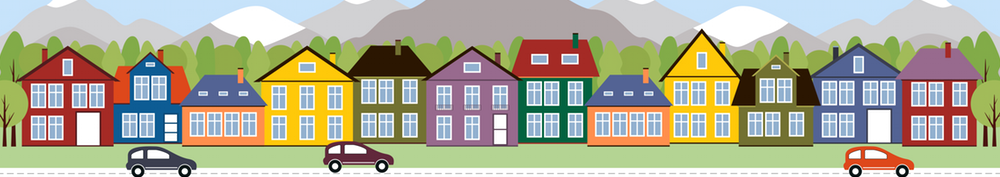


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale


download data set from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'/home/vijay/Desktop/Studies/Data world/github/SkLearn'

In [4]:
ls

1 - classification (Gender Voice Classification).ipynb
 1 - Regression ( House Prices Advanced Regression).ipynb
2 - classification ( Bank Marketing with XGBOOST).ipynb
2 - Regression (Student math).ipynb
Data/


In [5]:
traindf=pd.read_csv("Data/houseprice.csv")

In [6]:
numeric_features = traindf.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
categorical_features = traindf.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
traindf.isnull().values.any()

True

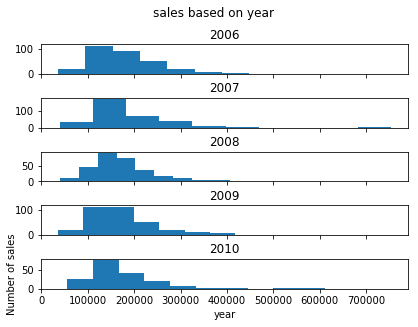

In [10]:
sale_2006 = traindf[traindf.YrSold == 2006]
sale_2007 = traindf[traindf.YrSold == 2007]
sale_2008 = traindf[traindf.YrSold == 2008]
sale_2009 = traindf[traindf.YrSold == 2009]
sale_2010 = traindf[traindf.YrSold == 2010]

f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, sharex=True)
f.suptitle('sales based on year')

bins = 10

ax1.hist(sale_2006.SalePrice, bins = bins)

ax1.set_title('2006')

ax2.hist(sale_2007.SalePrice, bins = bins)

ax2.set_title('2007')

ax3.hist(sale_2008.SalePrice, bins = bins)

ax3.set_title('2008')

ax4.hist(sale_2009.SalePrice, bins = bins)

ax4.set_title('2009')

ax5.hist(sale_2010.SalePrice, bins = bins)

ax5.set_title('2010')


plt.xlabel('year')
plt.ylabel('Number of sales')
plt.subplots_adjust(top=0.85, bottom=0.001, left=0.10, right=0.95, hspace=0.80,
                    wspace=0.99)
plt.show();


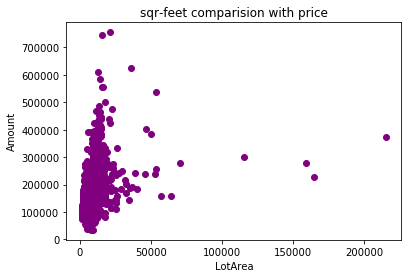

In [67]:
plt.scatter(traindf.LotArea,traindf.SalePrice,color='purple')
plt.xlabel('LotArea')
plt.ylabel('Amount')
plt.title('sqr-feet comparision with price')
plt.show()

In [68]:
max_saleprice_profile=traindf[traindf.SalePrice == max(traindf.SalePrice)]
max_lotArea_profile=traindf[traindf.LotArea == max(traindf.LotArea)]

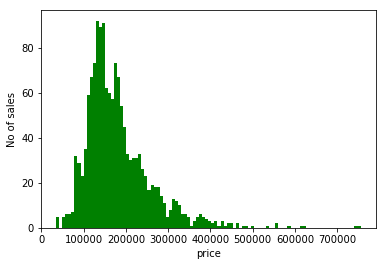

In [69]:
bins = 100

plt.hist(traindf.SalePrice, bins = bins,color='green')
plt.xlabel("price")
plt.ylabel("No of sales")
plt.show()

In [70]:
numeric_features_name=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

In [71]:
categorical_features_name=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [72]:
for i in categorical_features_name:
    traindf[i]=traindf[i].fillna("UNKNOWN")

In [73]:
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,UNKNOWN,Reg,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,UNKNOWN,Reg,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,UNKNOWN,IR1,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,UNKNOWN,IR1,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,UNKNOWN,IR1,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,12,2008,WD,Normal,250000


In [74]:
traindf.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [75]:
traindf.isnull().values.any()

True

In [76]:
train_x=traindf.iloc[:,1:-1].values
train_y=traindf.iloc[:,-1].values

In [77]:
string_index=[]
for i,c in enumerate(train_x[0]):
    if type(c) == str:
        string_index.append(i)

In [78]:
train_x.shape

(1460, 79)

In [79]:
train_y.shape

(1460,)

In [80]:
train_x[0]

array([60, 'RL', 65.0, 8450, 'Pave', 'UNKNOWN', 'Reg', 'Lvl', 'AllPub',
       'Inside', 'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam', '2Story', 7, 5,
       2003, 2003, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'BrkFace',
       196.0, 'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ', 706, 'Unf', 0,
       150, 856, 'GasA', 'Ex', 'Y', 'SBrkr', 856, 854, 0, 1710, 1, 0, 2, 1,
       3, 1, 'Gd', 8, 'Typ', 0, 'UNKNOWN', 'Attchd', 2003.0, 'RFn', 2, 548,
       'TA', 'TA', 'Y', 0, 61, 0, 0, 0, 0, 'UNKNOWN', 'UNKNOWN', 'UNKNOWN',
       0, 2, 2008, 'WD', 'Normal'], dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for i in string_index:
    labelencoder_X = LabelEncoder()
    train_x[:,i] = labelencoder_X.fit_transform(train_x[:,i])

In [82]:
train_x[0]

array([60, 3, 65.0, 8450, 1, 2, 3, 3, 0, 4, 0, 5, 2, 2, 0, 5, 7, 5, 2003,
       2003, 1, 1, 12, 13, 1, 196.0, 2, 4, 2, 2, 3, 3, 2, 706, 6, 0, 150,
       856, 1, 0, 1, 4, 856, 854, 0, 1710, 1, 0, 2, 1, 3, 1, 2, 8, 6, 0, 5,
       1, 2003.0, 1, 2, 548, 4, 4, 2, 0, 61, 0, 0, 0, 0, 3, 4, 4, 0, 2,
       2008, 8, 4], dtype=object)

In [83]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(train_x[:,:])
train_x[:, :] = imputer.transform(train_x[:, :])

In [84]:
train_x[0]

array([60.0, 3.0, 65.0, 8450.0, 1.0, 2.0, 3.0, 3.0, 0.0, 4.0, 0.0, 5.0,
       2.0, 2.0, 0.0, 5.0, 7.0, 5.0, 2003.0, 2003.0, 1.0, 1.0, 12.0, 13.0,
       1.0, 196.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 706.0, 6.0, 0.0,
       150.0, 856.0, 1.0, 0.0, 1.0, 4.0, 856.0, 854.0, 0.0, 1710.0, 1.0,
       0.0, 2.0, 1.0, 3.0, 1.0, 2.0, 8.0, 6.0, 0.0, 5.0, 1.0, 2003.0, 1.0,
       2.0, 548.0, 4.0, 4.0, 2.0, 0.0, 61.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0,
       4.0, 0.0, 2.0, 2008.0, 8.0, 4.0], dtype=object)

In [85]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_x = sc_X.fit_transform(train_x)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [86]:
train_x[0]

array([ 0.07337496, -0.04553194, -0.22937175, -0.20714171,  0.06423821,
        0.24471681,  0.75073056,  0.31466687, -0.02618016,  0.60466978,
       -0.22571613, -1.20621453, -0.03628912, -0.03174026, -0.41169079,
        1.02668924,  0.65147924, -0.51719981,  1.05099379,  0.87866809,
       -0.49151573, -0.12579688,  0.74309239,  0.75162623, -1.21648536,
        0.51141841, -0.77797579,  0.36420746,  0.83559903, -0.33983046,
        0.23293722,  0.59190549, -0.49061441,  0.57542484,  0.3503107 ,
       -0.28865283, -0.94459061, -0.45930254, -0.12304604, -0.88465767,
        0.26381257,  0.30159884, -0.79343379,  1.16185159, -0.12024172,
        0.37033344,  1.10781015, -0.24106104,  0.78974052,  1.22758538,
        0.16377912, -0.21145358, -0.40936914,  0.91220977,  0.25597761,
       -0.95122649,  0.85464957, -0.76873633,  1.02115667, -0.51818706,
        0.31172464,  0.35100032,  0.11211039,  0.06889955,  0.28974476,
       -0.75217584,  0.21650316, -0.3593249 , -0.11633929, -0.27

In [87]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
y_pred=lr.predict(train_x)

In [89]:
import math
from sklearn.metrics import mean_squared_error
sd = math.sqrt(mean_squared_error(train_y, y_pred))
print(sd)

30227.570873335848


In [90]:
from sklearn.svm import SVR
svr=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(train_x,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [91]:
y_pred=svr.predict(train_x)

In [92]:
import math
from sklearn.metrics import mean_squared_error
sd = math.sqrt(mean_squared_error(train_y, y_pred))
print(sd)

81367.21990464137


In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [94]:
y_pred=regressor.predict(train_x)

In [95]:
import math
from sklearn.metrics import mean_squared_error
sd = math.sqrt(mean_squared_error(train_y, y_pred))
print(sd)

12420.413325595495


In [96]:
from sklearn import ensemble
params = {'n_estimators': 5000, 'max_depth': 10, 'min_samples_split': 5,
          'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(train_x, train_y)

mse = math.sqrt(mean_squared_error(train_y, clf.predict(train_x)))
print("MSE: %.4f" % mse)


MSE: 1090.7077


In [100]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = train_x, y = train_y, cv = 10)
print('accuracy_mean {0} accuracy_std {1}'.format(accuracies.mean(),accuracies.std()))

accuracy_mean 0.8355484607070214 accuracy_std 0.05104662555565594
